<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی برق
</font>
<br>
<font color=green>
مقدمه ای بر یادگیری ماشین - دکتر گلستانی
</font>
<br>
ترم اول سال تحصیلی 1400-1401
<br>
امیرحسین صفری
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>تمرین کامپیوتری سری اول</div>
</font>
<hr>
</font></div>


<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>


In [6]:
# change directory to MyDrive/CHW1
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_CHWs/CHW1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_CHWs/CHW1


In [3]:
# import desrired libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# problem C1
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=left>
<font face="B Nazanin" size=30 color = red>
<p></p>
مساله اول
</font>
</div>


In [7]:
# load Q1_data.csv with pandas
Q1_data = pd.read_csv (r'Q1_data.csv')  
data_columns = list(Q1_data.columns)
print (Q1_data)

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        317          107  ...  8.28         0              0.66
1             2        302           99  ...  7.97         0              0.56
2             3        299           96  ...  7.86         0              0.54
3             4        323          108  ...  8.60         0              0.45
4             5        314          106  ...  8.90         0              0.74
..          ...        ...          ...  ...   ...       ...               ...
497         498        320          110  ...  9.27         1              0.87
498         499        308          104  ...  8.07         0              0.65
499         500        330          116  ...  9.36         1              0.93
500         500        307          101  ...  8.20         0              0.47
501         501        336          119  ...  9.62         1              0.95

[502 rows x 9 columns]


In [8]:
# convert pandas dataframe to numpy array for other operation:
Q1_data = Q1_data.to_numpy()

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=6 color = red>
<p></p>
بخش الف


In [9]:
# split training and validate sets:
training_set = Q1_data[0:402,:]
validation_set = Q1_data[402:502,:]
print(len(training_set))
print(len(validation_set))

402
100


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = red size=6>
<p></p>
بخش ب 
</font>
<br>
با استفاده از روابط زیر که در درس مطرح شده اند ، بردار وزن ها را به دست می آوریم
</font>
</div>

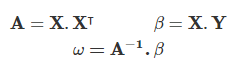   


In [10]:
# define X with padding 1 and Y matrices based on trainig_set to find W
x = training_set[:,1:8].T
one_mat = np.ones((1, x.shape[1]))
X = np.vstack((one_mat, x))
Y = training_set[:,8].T

# find A and B matrices based on X, Y:
A = np.matmul(X, X.T)
B = np.matmul(X, Y)

# find W vector based on A, B:
W = np.matmul(np.linalg.inv(A), B)
print(f'W = {W}')

W = [-1.14854141  0.0013267   0.00251244  0.00595324  0.00377221  0.01610903
  0.12575304  0.02376599]


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=6>
<p></p>
که بردار وزن ها به طور تقریبی به صورت زیر می شود
</div>
<font size = 4>
$\omega_{8,1} = \begin{bmatrix}
  -1.1485 &  0.0013 & 0.0025 & 0.0060 & 0.0038 & 0.0161 & 0.1258 & 0.2377
 \end{bmatrix}^T$


---



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<font color = red size = 6>
بخش  ج 
</font>
<br>
مقدار خطای تجربی را با استفاده از رابطه ی زیر به دست می آوریم ، هم چنین می توانیم با استفاده از ماتریس های موجود و روابط ماتریسی این مقدار خطا را به دست آورد هم چنین تخمینی از خطای واقعی را هم دقیقا با استفاده از همین رابطه اما روی دیتاست اعتبارسنجی اعمال می کنیم 
</div>
</font>
$Empirical\_risk = \frac{1}{402}\sum_{i = 1}^{402} ((\mathbf\omega^{T}.x_i) - y_i)^2 = \frac{1} {402} sum(<\omega^{T}.\mathbf{X} - \mathbf{Y^{T}}, \omega^{T}.\mathbf{X} - \mathbf{Y^{T}}>)\space\\~~s.t.\space~~~ x_i \in\mathbf{X} = training\_set$
$True\_risk = \frac{1}{100}\sum_{i = 1}^{100} ((\mathbf\omega^{T}.x\_v_i) - y\_v_i)^2 = \frac{1}{100} sum(<\omega^{T}.\mathbf{X_v} - \mathbf{Y_v^{T}}, \omega^{T}.\mathbf{X_v} - \mathbf{Y_v^{T}}>)\space\\~~s.t.\space~~~ x\_v_i \in\mathbf{X_v} = validation\_set$

In [19]:
# define X_v and Y_v for split X and Y from validation_set
x_v = validation_set[:,1:8].T
one_mat = np.ones((1, x_v.shape[1]))
X_v = np.vstack((one_mat, x_v))
Y_v = validation_set[:,8].T

# now find Emprical and True risks respectively
empirical_risk = (1/402)*np.sum(np.dot((np.matmul(W.T, X) - Y.T), (np.matmul(W.T, X) - Y.T)))
true_risk = (1/100)*np.sum(np.dot((np.matmul(W.T, X_v) - Y_v.T), (np.matmul(W.T, X_v) - Y_v.T)))
print(f'Empirical_risk = {empirical_risk} and True_risk = {true_risk}')

Empirical_risk = 0.003473207924540261 and True_risk = 0.0038595347908546426


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<p></p>
همانطور که از نتایج فوق نیز بر می آید ، تخمین خطای واقعی و خطای تجربی تقریبا برابر شده اند اما تخمین خطای واقعی اندکی از خطای تجربی بیشتر شده است 
</div>

---



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="IranNastaliq" size=5>
<font color = red size = 6>
بخش د
</font>
<p></p>
</font>
</div>


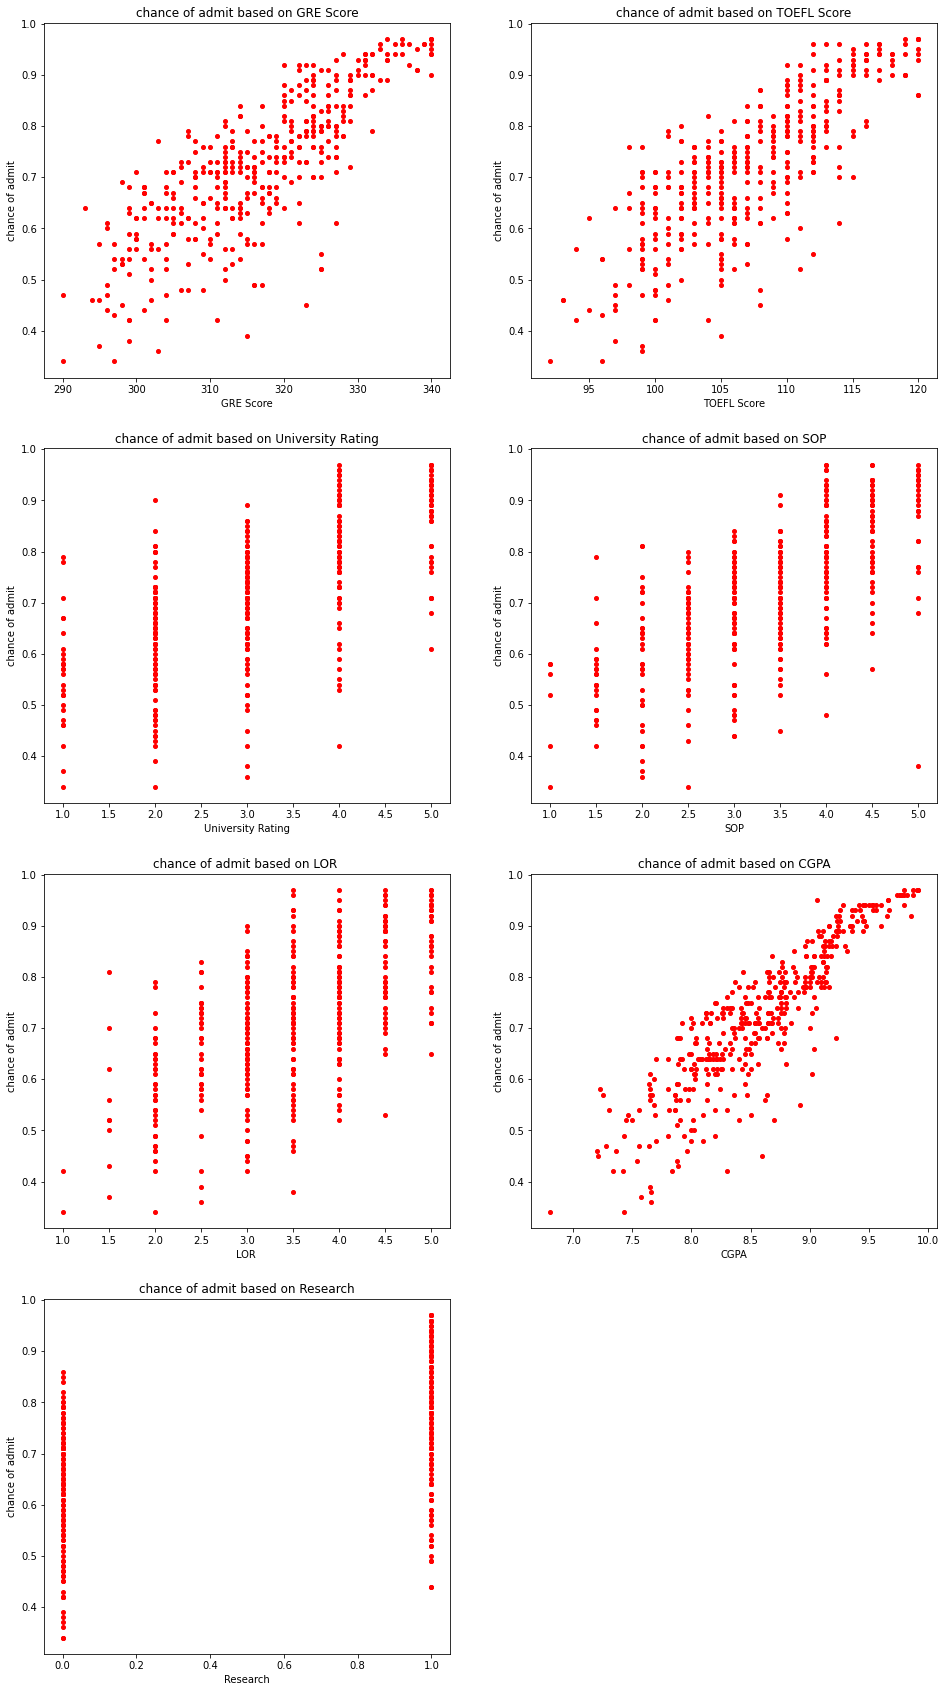

In [12]:
plt.figure(figsize=(16,30))
for i in range(0,7):
    training_feature = training_set[:,i+1]
    plt.subplot(4, 2,i + 1)
    plt.plot(training_feature, Y,'.',markersize=8, color = 'r')
    plt.title(f'chance of admit based on {data_columns[i + 1]}')
    plt.ylabel('chance of admit')
    plt.xlabel(f'{data_columns[i + 1]}')
   

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<p></p>
ارتباط  CGPAبراساس مشاهده ی نتایج فوق می توان به این نتیجه رسید که پارامتر  
<br>
بیشتری با احتمال موفقیت دارد
</div>



---



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ه
</font>
<p></p>
</div>

In [14]:
# find W vector based on CGPA feature and Y(chance of admit)
x_cgpa = training_set[:,6].T
one_mat = np.ones((1, x_cgpa.shape[0]))
X_cgpa = np.vstack((one_mat, x_cgpa))
Y = training_set[:,8].T

# find A and B matrices based on X_cgpa, Y_cgpa:
A_cgpa = np.matmul(X_cgpa, X_cgpa.T)
B_cgpa = np.matmul(X_cgpa, Y)

# find W vector based on A, B:
W_cgpa = np.matmul(np.linalg.inv(A_cgpa), B_cgpa)
print(f'W_cgpa = {W_cgpa}')

W_cgpa = [-1.04294068  0.20539181]


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=6>
<p></p>
که بردار وزن ها به طور تقریبی به صورت زیر می شود
</div>
$\omega_{2,1} =
 \begin{pmatrix}
    -1.0429 \\
    0.2054
 \end{pmatrix}$



---

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش و
</font>
<p></p>
</div>

In [15]:
# define X_cgpa_v and Y_v for split X and Y from validation_set
x_cgpa_v = validation_set[:,6].T
one_mat = np.ones((1, x_cgpa_v.shape[0]))
X_cgpa_v = np.vstack((one_mat, x_cgpa_v))
Y_v = validation_set[:,8].T

# now find Emprical and True risks respectively 
empirical_risk_cgpa = np.sum(np.dot((np.matmul(W_cgpa.T, X_cgpa) - Y.T), (np.matmul(W_cgpa.T, X_cgpa) - Y.T)))
true_risk_cgpa = np.sum(np.dot((np.matmul(W_cgpa.T, X_cgpa_v) - Y_v.T), (np.matmul(W_cgpa.T, X_cgpa_v) - Y_v.T)))
print(f'Empirical_risk = {empirical_risk_cgpa} and True_risk = {true_risk_cgpa}')

Empirical_risk = 1.6641132678726747 and True_risk = 0.5419755263360151


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ز
</font>
<br>
در نتیجه با توجه به اینکه در این حالت تنها از یک متغیر برای اعمال رگرسیون خطی استفاده کردیم ، مقادیر خطا هم برای خطای تجربی و هم برای تخمینی از خطای واقعی نسبت به حالت قبل افزایش یافته است 
<p></p>
</div>


---



# problem C2
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=30 color = red>
<p></p>
مساله دوم
</font>
</div>

In [18]:
#load the datasets:
T = np.load('test_data.npy')
V = np.load('validation_data.npy')
S = np.load('train_data.npy')

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش الف
</font>
<p></p>
از روابط زیر استفاده می کنیم hدر این بخش برای پیدا کردن بردار ضرایب یا تابع
</div>
<div>
<font size = 4>
$\phi_n(x) = \begin{bmatrix}1 & x^n \end{bmatrix} \space~~~ n = 1,2,...,15 $
<br>
$A_n = \phi_n(x).\phi_n(x)^T$
<br>
$\beta_n = \phi_n(x).Y $
<br>
$W_n = A_n^{-1}.\beta_n$


Text(0, 0.5, 'empirical_risk')

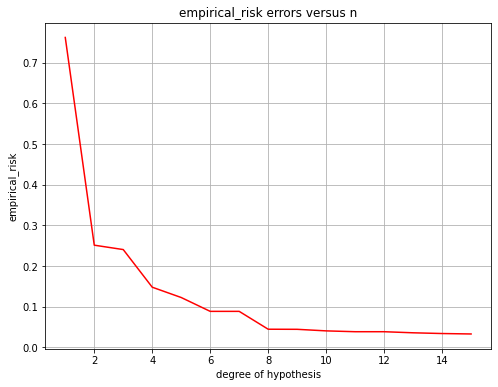

In [64]:
# use loop for each n = 1 to 15:
#define two below lists for all n
empirical_risks = []
Ws = []
x_training = S[:,0].T
Y_training = S[:,1].T

for n in range(1, 16):
    # find Ws:
    phi_training = np.ones((1, x_training.shape[0]))  # initial phi_training
    for m in range(1, n + 1):
        phi_training = np.vstack((phi_training, np.power(x_training.T , m)))
    A = np.matmul(phi_training, phi_training.T)
    B = np.matmul(phi_training, Y_training)
    W = np.matmul(np.linalg.inv(A), B)
    Ws.append(W)

    # find empirical_risk errors:
    empirical_risk = (1/len(x_training))*np.sum(np.power((np.matmul(W.T, phi_training) - Y_training.T), 2))
    empirical_risks.append(empirical_risk)

# plot empirical_risk for each n:
plt.figure(figsize = (8,6))
plt.plot(range(1,16), empirical_risks,color = 'r')
plt.grid(True)
plt.title('empirical_risk errors versus n')
plt.xlabel('degree of hypothesis')
plt.ylabel('empirical_risk')


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ب
</font>
<p></p>
در ابتدا می دانیم که مقدار خطای تجربی با افزایش درجه ی فرض همواره کاهش می یابد و به طور کلی در صورتی که درجه ی چندجمله ای یکی کمتر از تعداد نمونه های دیتاست باشد ، این خطای تجربی صفر می شود در حالیکه آن چه که ملاک تشخیصی یک چندجمله ای مناسب می باشد خطای حاصل از اعمال این چندجمله ای بر داده های واقعی دیگر و تست می باشد که رفتار این داده ها مطابق انتظار یک رفتار تصادفی تری نسبت به چندجمله های با درجه ی بالایی که ما به داده های یادگیری فیت کرده ایم داشته باشند ، لذا در کل انتظار بر این است که از نقطه ای معین هر چند که خطای تجربی کاهش پیدا میکند اما خطای اعتبارسنجی ( و خطای واقعی ) کاهش پیدا کند   
</div>
<div>

Text(0, 0.5, 'empirical_risk')

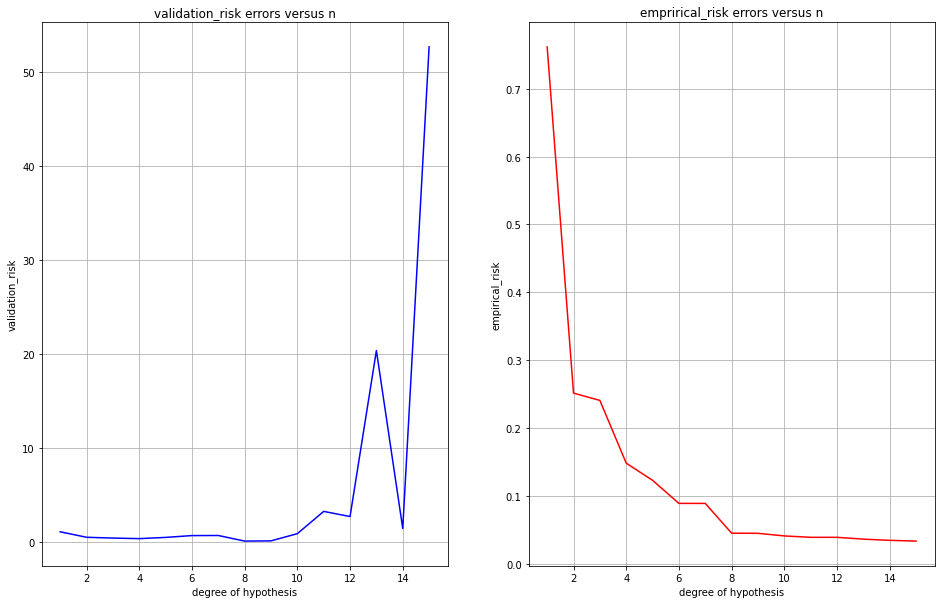

In [65]:
# use loop for each n = 1 to 15:
#define two below lists for all n
validation_risks = []
x_validation = V[:,0].T
Y_validation = V[:,1].T

for n in range(1, 16):
    # find validation_risk errors:
    phi_validation = np.ones((1, x_validation.shape[0]))  # initial phi_validation
    for m in range(1, n + 1):
        phi_validation = np.vstack((phi_validation, np.power(x_validation.T , m)))

    validation_risk = (1/len(x_validation))*np.sum(np.power((np.matmul(Ws[n-1].T, phi_validation) - Y_validation.T), 2))
    validation_risks.append(validation_risk)

# plot empirical_risk for each n:
plt.figure(figsize = (16,10))
plt.subplot(121)
plt.plot(range(1,16), validation_risks,color = 'b')
plt.grid(True)
plt.title('validation_risk errors versus n')
plt.xlabel('degree of hypothesis')
plt.ylabel('validation_risk')

plt.subplot(122)
plt.plot(range(1,16), empirical_risks,color = 'r')
plt.grid(True)
plt.title('emprirical_risk errors versus n')
plt.xlabel('degree of hypothesis')
plt.ylabel('empirical_risk')

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ج
</font>
<p></p>
همانطور که در بخش ب نیز توضیح داده شد ، مطابق انتظار مسیر نزولی بودن خطاهای تجربی و اعتبارسنجی تا نقطه ای معین پیش خواهد رفت اما از آن نقطه به بعد خطای اعتبارسنجی برخلاف خطای تجربی افزایش پیدا می کند
</div>
<div>


---



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش د
</font>
<p></p>
برای نتیجه گیری درباره ی بهترین درجه ی چندجمله ای از خطای اعتبارسنجی استفاده می کنیم به این دلیل که نمونه های اعتبارسنجی از لحاط آماری و رفتار ، جدای از داده های یادگیری می باشد و در پروسه ی یافتن بردار وزن ها دخالت ندارند و در نتیجه  چندجمله ای که درجه ی آن از خطای اعتبار سنجی به دست آید مناسب تر بوده و احتمال بیش برازش نیز کاهش می یابد
و با استفاده از نمودار خطای اعتبارسنجی می توان به این نتیجه رسید که درجه ی مناسب برای چندجمله ای 8 می باشد  
</div>
<div>


---



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ه
</font>
<p></p>  
</div>
<div>

In [73]:
n_best = 8
x_test = T[:,0].T
Y_test = T[:,1].T

# produce phi_test:
phi_test = np.ones((1, x_test.shape[0]))  # initial phi_test
for m in range(1, n_best + 1):
    phi_test = np.vstack((phi_test, np.power(x_test.T , m)))

# find true risk:
W_best = Ws[n_best - 1]
true_risk = (1/len(x_test))*np.sum(np.power((np.matmul(W_best.T, phi_test) - Y_test.T), 2))

print(f'True risk = L(h*) = {true_risk}')

True risk = L(h*) = 0.1179142479721606


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=right>
<font face="B Nazanin" size=5>
<font color = 'red' size = 6>
بخش ه
</font>
<p></p>  
با توجه به اینکه با استفاده از دیتاست اعتبارسنجی مقدار درجه ی چندجمله ای مناسب را پیدا کردیم لذا این داده های اعتبارسنجی در مدل ما و چندجمله ای ما دخالت داشته و اثرگذار بوده اند ، به طور شهودی مطلوب ما این است که در نهایت خطایی که برای یک چندجمله ای گزارش می کنیم ، خطای به دست آمده از اعمال این چندجمله ای بر داده هایی باشند که به هیچ شکل تاثیری در انتخاب چندجمله ای نداشته باشند و کمترین شباهت را از لحاظ آماری به سایر داده های یادگیری و اعتبارسنجی داشته باشند و انتظار داریم که این نتیجه بسیار مشابه با خطای واقعی مدل به دست آمده باشند لذا حتما بایستی به غیر از داده ی یادگیری ( که برای به دست آوردن بردارهای ضرایب استفاده می شود ) و داده ی اعتبارسنجی ( که برای یافتن بهترین بردارضرایب به کار  می رود) یک دیتاست تست هم داشته باشیم که بتوانیم با استفاده از آن به طورتقریبی خطای حقیقی را به دست آوریم   
</div>
<div>